# Table of Contents
* [The HiC_data object](#The-HiC_data-object)
* [Filter columns with too few interaction count](#Filter-columns-with-too-few-interaction-count)
* [Normalization](#Normalization)
	* [Other normalizations](#Other-normalizations)
* [Save raw and normalized matrices](#Save-raw-and-normalized-matrices)
	* [Save biases and bin filtering](#Save-biases-and-bin-filtering)
	* [Save normalized chromosome matrices](#Save-normalized-chromosome-matrices)


# The HiC_data object

In [30]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [43]:
r_enz = 'MboI'
reso = 1000000

In [44]:
hic_data = load_hic_data_from_reads(
    'results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz),
    reso)

# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


   123   124   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   585
   742   931   932  1124  1295  1296  1440  1563  1564  1565  1566  1567  1571  1572  1586  1587  1588  1589  1590  1591
  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1602  1721  1866  1867  1868  1986  1987  2085  2086  2087
  2088  2089  2090  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  2101  2102  2200  2201  2202  2203  2204
  2205  2206  2207  2208  2209  2210  2211  2212  2213  2214  2215  2216  2217  2307  2308  2309  2310  2311  2312  2313
  2314  2315  2316  2317  2318  2319  2320  2321  2322  2323  2324  2326  2447  2448  2449  2450  2451  2452  2453  2454
  2455  2601  2602  2603  2604  2691  2692  2752  2790  2791  2792  2793  2794  2801  2802  2837  2838  2839  2840  2841
  2842  2843  2844  2845  2846  2850  2851  2888  2889  2947  2948  2949  3044  3045  3046  3047  3049  3050  3051  3052
  3053  3054  3057  3058  3059 

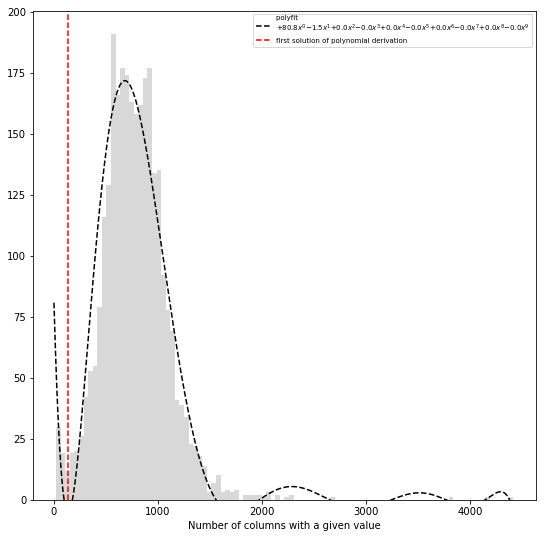

Found 266 of 3102 columns with poor signal



     1   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141
   142   143   145   340   341   342   343   492   584   585   691   742   882   930   931   932   953  1124  1294  1295
  1296  1297  1403  1440  1441  1541  1563  1564  1565  1566  1567  1571  1572  1581  1582  1585  1586  1587  1588  1589
  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1602  1603  1604  1605  1606  1607  1608  1609
  1680  1721  1722  1866  1867  1868  1950  1986  1987  2085  2086  2087  2088  2089  2090  2091  2092  2093  2094  2095
  2096  2097  2098  2099  2100  2101  2102  2199  2200  2201  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211
  2212  2213  2214  2215  2216  2217  2218  2307  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317  2318  2319
  2320  2321  2322  2323  2324  2325  2326  2327  2329  2444  2446  2447  2448  2449  2450  2451  2452  2453  2454  2455
  2500  2524  2525  2526  2584 

In [45]:
hic_data.filter_columns(draw_hist=True, min_count=10, by_mean=True)

In [46]:
print len(hic_data)
print len(hic_data.bads)

3102
266


## Save the sum of bins for Quique

In [47]:
bins = []
for i in range(len(hic_data)):
    bins.append(sum(hic_data[i, j] for j in range(len(hic_data))))

out = open('results/fragment/{1}/04_normalizing/biases_{0}_{1}.tsv'.format(reso, r_enz), 'w')
for val in bins:
    out.write(str(val) + '\n')
out.close()

# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

In [48]:
hic_data.normalize_hic(iterations=10, max_dev=0.1)

iterative correction
  - copying matrix
  - computing baises
           138.000         790.629        4403.000    0   4.56898
           399.372         861.843        2175.062    1   1.52373
           436.749         893.671        1220.721    2   0.51129
           739.963         908.526        1522.920    3   0.67625
           613.184         916.395        1058.900    4   0.33087
           823.897         920.596        1246.005    5   0.35348
           728.392         923.008         999.354    6   0.21085
           870.724         924.391        1109.283    7   0.20001
           801.121         925.223         966.047    8   0.13413
           896.220         925.721        1036.769    9   0.11996
           846.201         926.030         949.790   10   0.08620
rescaling to factor 1
  - getting the sum of the matrix
    => 2836.582
  - rescaling biases


At 100 kb itmakes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

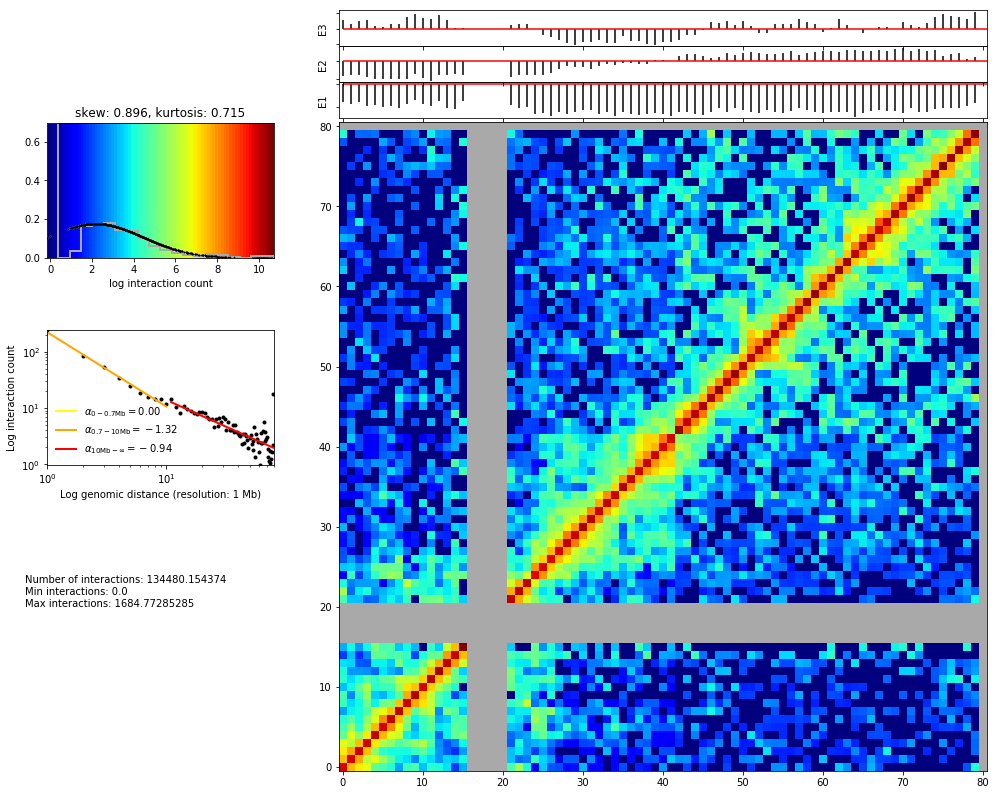

In [49]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr18', show=True)

## Other normalizations

ICE normalization is widely used however other, more convaluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save biases and bin filtering

In [50]:
from cPickle import dump

In [51]:
! mkdir -p results/fragment/$r_enz/04_normalizing

Save biases to separate file.

In [52]:
out = open('results/fragment/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz), 'w')
dump(hic_data.bias, out)
out.close()

Save "bad" columns to an other file

In [53]:
out = open('results/fragment/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz), 'w')
dump(hic_data.bads, out)
out.close()

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [27]:
hic_map(hic_data, by_chrom='intra', normalized=False,
       savedata='results/fragment/{1}/04_normalizing/{0}_raw'.format(reso, r_enz))

In [28]:
hic_map(hic_data, by_chrom='intra', normalized=True,
       savedata='results/fragment/{1}/04_normalizing/{0}_norm'.format(reso, r_enz))

If the resolution is not to low, we could also save genomic matrices:

In [29]:
if reso >= 300000:
    hic_map(hic_data, by_chrom=False, normalized=False,
            savedata='results/fragment/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz))

    hic_map(hic_data, by_chrom=False, normalized=True,
            savedata='results/fragment/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz))

<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

